In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Separation en 2 dataset

In [45]:
# Chargement des données
data= pd.read_csv("Hotel_Reviews_pointvirgule.csv", sep= ";")

In [70]:
data1 = data.sample(frac = 0.80)
data2 = data.drop(data1.index)
data2.count()

Unnamed: 0                                    82518
Hotel_Address                                 82518
Additional_Number_of_Scoring                  82518
Review_Date                                   82518
Average_Score                                 82518
Hotel_Name                                    82518
Reviewer_Nationality                          82518
Negative_Review                               82518
Review_Total_Negative_Word_Counts             82518
Total_Number_of_Reviews                       82518
Positive_Review                               82518
Review_Total_Positive_Word_Counts             82518
Total_Number_of_Reviews_Reviewer_Has_Given    82518
Reviewer_Score                                82518
Tags                                          82518
days_since_review                             82518
lat                                           82004
lng                                           82004
dtype: int64

In [52]:
data1.to_csv("dataset_booking.csv", sep=";")


In [54]:
data2.to_csv("streaming_booking.csv",sep=";")

# Preparation du Dataset


In [94]:
training_data = "dataset_booking.csv"
streaming_data= "streaming_booking.csv"

In [95]:
data= pd.read_csv(streaming_data, sep= ";")

In [96]:
for idx,column in enumerate(data.columns):
    print(idx,column)

0 Unnamed: 0
1 Hotel_Address
2 Additional_Number_of_Scoring
3 Review_Date
4 Average_Score
5 Hotel_Name
6 Reviewer_Nationality
7 Negative_Review
8 Review_Total_Negative_Word_Counts
9 Total_Number_of_Reviews
10 Positive_Review
11 Review_Total_Positive_Word_Counts
12 Total_Number_of_Reviews_Reviewer_Has_Given
13 Reviewer_Score
14 Tags
15 days_since_review
16 lat
17 lng


In [99]:
data.shape

(103148, 18)

## Review Negatives

In [132]:
# Review Negative
df_negative= pd.DataFrame(data.iloc[:,[5,16,17,4,7,8,14]])
df_negative.insert(5, "Polarity", 0, allow_duplicates=False)
df_negative.columns.values[2] = "long"
df_negative.columns.values[4] = "Review"
df_negative.columns.values[6] = "Word_counts"
df_negative.head()

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
0,Hotel Arena,52.360576,4.915968,7.7,No Negative,0,0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,52.360576,4.915968,7.7,Rooms are nice but for elderly a bit difficul...,0,42,"[' Leisure trip ', ' Family with young childre..."
2,Hotel Arena,52.360576,4.915968,7.7,My room was dirty and I was afraid to walk ba...,0,210,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
3,Hotel Arena,52.360576,4.915968,7.7,Backyard of the hotel is total mess shouldn t...,0,17,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
4,Hotel Arena,52.360576,4.915968,7.7,Even though the pictures show very clean room...,0,34,"[' Leisure trip ', ' Couple ', ' Duplex Double..."


In [133]:
len(df_negative)

103148

### Correction de la polarité

In [134]:
def change_to_positive_polarity(Review):
    if Review == "No Negative" :
       return(1)
    else:
        return(0)

In [135]:
df_negative["Polarity"]= df_negative["Review"].apply(change_to_positive_polarity)
df_negative

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
0,Hotel Arena,52.360576,4.915968,7.7,No Negative,1,0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,52.360576,4.915968,7.7,Rooms are nice but for elderly a bit difficul...,0,42,"[' Leisure trip ', ' Family with young childre..."
2,Hotel Arena,52.360576,4.915968,7.7,My room was dirty and I was afraid to walk ba...,0,210,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
3,Hotel Arena,52.360576,4.915968,7.7,Backyard of the hotel is total mess shouldn t...,0,17,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
4,Hotel Arena,52.360576,4.915968,7.7,Even though the pictures show very clean room...,0,34,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
...,...,...,...,...,...,...,...,...
103143,Atlantis Hotel Vienna,48.203745,16.335677,8.1,Staff not always at reception and had to wait...,0,16,"[' Leisure trip ', ' Family with older childre..."
103144,Atlantis Hotel Vienna,48.203745,16.335677,8.1,No Negative,1,0,"[' Leisure trip ', ' Family with young childre..."
103145,Atlantis Hotel Vienna,48.203745,16.335677,8.1,noisy at night air causing loud banging in he...,0,19,"[' Business trip ', ' Solo traveler ', ' Stand..."
103146,Atlantis Hotel Vienna,48.203745,16.335677,8.1,Wifi Location No tea or coffee in the room,0,10,"[' Leisure trip ', ' Couple ', ' Standard Doub..."


In [145]:
#len(df_negative[df_negative['Polarity']== 0])
len(df_negative[df_negative['Polarity']== 1])

7097

### Suppression avis Negatif (Réequilibrage)

In [144]:
df_negative=df_negative.sort_values(by=['Polarity'])
df_negative.drop(df_negative.tail(18800).index, 
       inplace = True) 
df_negative

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
41275,Golden Tulip Washington Opera,48.866242,2.337317,8.3,Nothing,0,2,"[' Leisure trip ', ' Solo traveler ', ' Classi..."
54052,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,stuff was not frienldy,0,5,"[' Leisure trip ', ' Solo traveler ', ' Standa..."
54051,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,The hotel feels definitely old and outdated t...,0,15,"[' Business trip ', ' Solo traveler ', ' Stand..."
54050,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,N A,0,3,"[' Leisure trip ', ' Group ', ' Standard Doubl..."
54049,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,Single room too small,0,6,"[' Leisure trip ', ' Couple ', ' Standard Sing..."
...,...,...,...,...,...,...,...,...
21651,Conrad London St James,51.499393,-0.132913,9.1,No Negative,1,0,"[' Leisure trip ', ' Family with young childre..."
21678,Conrad London St James,51.499393,-0.132913,9.1,No Negative,1,0,"[' Leisure trip ', ' Couple ', ' King Grand De..."
21682,Conrad London St James,51.499393,-0.132913,9.1,No Negative,1,0,"[' Leisure trip ', ' Group ', ' Twin Superior ..."
21684,Conrad London St James,51.499393,-0.132913,9.1,No Negative,1,0,"[' Business trip ', ' Group ', ' Twin Deluxe R..."


In [108]:
#df_negative[df_negative['Polarity']== 0].count()
df_negative[df_negative['Polarity']== 1].count()

Hotel_Name       0
lat              0
long             0
Average_Score    0
Review           0
Polarity         0
Word_counts      0
Tags             0
dtype: int64

## Review Positives

In [138]:
# Review Positive
df_positive= pd.DataFrame(data.iloc[:,[5,16,17,4,10,11,14]])
df_positive.insert(5, "Polarity", 1, allow_duplicates=False)
df_positive.columns.values[2] = "long"
df_positive.columns.values[4] = "Review"
df_positive.columns.values[6] = "Word_counts"
df_positive.head()

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
0,Hotel Arena,52.360576,4.915968,7.7,No real complaints the hotel was great great ...,1,105,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,52.360576,4.915968,7.7,Location was good and staff were ok It is cut...,1,21,"[' Leisure trip ', ' Family with young childre..."
2,Hotel Arena,52.360576,4.915968,7.7,Great location in nice surroundings the bar a...,1,26,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
3,Hotel Arena,52.360576,4.915968,7.7,Good restaurant with modern design great chil...,1,20,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
4,Hotel Arena,52.360576,4.915968,7.7,No Positive,1,0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."


In [139]:
len(df_positive)

103148

### Correction de la polarité

In [140]:
def change_to_negative_polarity(Review):
    if Review == "No Positive" :
       return(0)
    else:
        return(1)

In [141]:
df_positive["Polarity"]= df_positive["Review"].apply(change_to_negative_polarity)
df_positive

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
0,Hotel Arena,52.360576,4.915968,7.7,No real complaints the hotel was great great ...,1,105,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,52.360576,4.915968,7.7,Location was good and staff were ok It is cut...,1,21,"[' Leisure trip ', ' Family with young childre..."
2,Hotel Arena,52.360576,4.915968,7.7,Great location in nice surroundings the bar a...,1,26,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
3,Hotel Arena,52.360576,4.915968,7.7,Good restaurant with modern design great chil...,1,20,"[' Leisure trip ', ' Group ', ' Duplex Double ..."
4,Hotel Arena,52.360576,4.915968,7.7,No Positive,0,0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
...,...,...,...,...,...,...,...,...
103143,Atlantis Hotel Vienna,48.203745,16.335677,8.1,The nice and friendly staff who were always h...,1,14,"[' Leisure trip ', ' Family with older childre..."
103144,Atlantis Hotel Vienna,48.203745,16.335677,8.1,Good breakfast Shooping center with supermArk...,1,23,"[' Leisure trip ', ' Family with young childre..."
103145,Atlantis Hotel Vienna,48.203745,16.335677,8.1,clean,1,2,"[' Business trip ', ' Solo traveler ', ' Stand..."
103146,Atlantis Hotel Vienna,48.203745,16.335677,8.1,Rather cheap and not to far away from the cen...,1,15,"[' Leisure trip ', ' Couple ', ' Standard Doub..."


In [ ]:
# test = df_positive[df_positive['Review']== "No Positive"]
# test.count()

In [143]:
len(df_positive[df_positive['Polarity']== 0])
#len(df_positive[df_positive['Polarity']== 1])

7130

# Concatenation des Review negative et posive

In [146]:
df = pd.concat([df_negative,df_positive], ignore_index=True)
df.head()

,Hotel_Name,lat,long,Average_Score,Review,Polarity,Word_counts,Tags
0,Golden Tulip Washington Opera,48.866242,2.337317,8.3,Nothing,0,2,"[' Leisure trip ', ' Solo traveler ', ' Classi..."
1,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,stuff was not frienldy,0,5,"[' Leisure trip ', ' Solo traveler ', ' Standa..."
2,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,The hotel feels definitely old and outdated t...,0,15,"[' Business trip ', ' Solo traveler ', ' Stand..."
3,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,N A,0,3,"[' Leisure trip ', ' Group ', ' Standard Doubl..."
4,Hampshire Hotel Rembrandt Square Amsterdam,52.366347,4.898576,7.8,Single room too small,0,6,"[' Leisure trip ', ' Couple ', ' Standard Sing..."


In [147]:
len(df)

187496

In [156]:
df = df.sample(frac=1)
df.columns= ['hotel_name','lat','long','average_score','review', 'polarity','word_counts','tags']
df

,hotel_name,lat,long,average_score,review,polarity,word_counts,tags
96668,Best Western S vres Montparnasse,48.843707,2.315563,7.8,Beds are comfortable,1,4,"[' Leisure trip ', ' Family with young childre..."
57697,Holiday Inn London Stratford City,51.542605,-0.007271,8.7,Cost of the breakfast is prohibitive especial...,0,21,"[' Leisure trip ', ' Family with older childre..."
71192,Novotel Suites Paris Montreuil Vincennes,48.855427,2.415256,7.6,Location very far from the city Centre,0,8,"[' Leisure trip ', ' Couple ', ' Superior Suit..."
121280,St James Court A Taj Hotel London,51.498673,-0.137687,8.7,Location was great and room was very comforta...,1,15,"[' Leisure trip ', ' Couple ', ' Classic King ..."
77101,Hotel Berna,45.482669,9.203437,9.2,Nothing to complain,0,5,"[' Leisure trip ', ' Family with young childre..."
...,...,...,...,...,...,...,...,...
20402,citizenM Amsterdam,52.341943,4.875960,8.6,Nothing,0,2,"[' Leisure trip ', ' Couple ', ' Double Room '..."
186950,Holiday Inn London Kensington,51.499981,-0.192879,7.8,No Positive,0,0,"[' Business trip ', ' Group ', ' Standard Doub..."
159696,IntercityHotel Wien,48.196588,16.341373,8.5,No Positive,0,0,"[' Leisure trip ', ' Group ', ' Double Room wi..."
95325,The Montague On The Gardens,51.520181,-0.125696,9.3,Staff can t do enough to make your stay extra...,1,26,"[' Leisure trip ', ' Couple ', ' Classic King ..."


In [149]:
df.dtypes

Hotel_Name        object
lat              float64
long             float64
Average_Score    float64
Review            object
Polarity           int64
Word_counts        int64
Tags              object
dtype: object

In [158]:
df['hotel_name'].nunique()

1491

In [159]:
negative= len(df[df['polarity']== 0])
positive= len(df[df['polarity']== 1])

# Balance du dataset

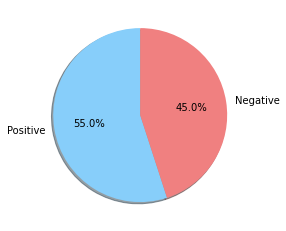

In [160]:
labels = 'Positive', 'Negative'
sizes = [positive, negative]
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',  shadow=True, startangle=90)
plt.show()

# Enregistrement du dataset

### Données pour le streaming

In [161]:
#df.to_csv("streaming_booking_prepared.csv",sep=";")

### Données pour aprentissage et test du modele

In [ ]:
#df.to_csv("dataset_booking_prepared2.csv",sep=";")